In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import os
import os, sklearn, pandas, numpy as np, random
from sklearn import svm
import skimage, skimage.io, skimage.filters
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle
import imp
from sklearn.preprocessing import LabelBinarizer
# from pcanet import PCANet
from pcanet import PCANet
import numpy as np
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'pcanet'

In [ ]:
# set cwd back to default
os.chdir('../')
os.getcwd()

In [ ]:
# custom scripts
import config # params, constants
import data, models # functions that mutate outr data
# from utils import utils, plot # custom functions, in local environment

In [ ]:
import data # src/data.py
dataset = data.init_dataset()

### load a model

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

## running tests


In [41]:
import numpy as np
# import sklearn.metrics.confusion_matrix

def evaluate(model):
    cvscores = []
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

evaluate(model_final_augmentation)

acc: 54.67%
54.67% (+/- 0.00%)


In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
    

In [29]:
import tensorflow as tf

y_pred_class = model_final.predict(x_test)
# con = tf.confusion_matrix(labels=y_test, predictions=y_pred_class )
# print(con)

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred_class ]


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
print(conf_mat)
# def confusion_matrix(model, x_test)
#     y_pred_class = model_final.predict(X_test)
#     con = tf.confusion_matrix(labels=y_train, predictions=y_pred_class )
#     print(cont)


[[29  1  1 24  5]
 [ 0 41  2  1 16]
 [ 0 11 34  1 14]
 [ 0  0  0 55  5]
 [ 0  5  0  4 51]]


In [40]:
num_classes = 5

# from lable to categorial
y_categorical = y_pred_class
# from categorial to lable indexing
y_pred = y_categorial.argmax(1)
print(y_pred)
# plot_confusion_matrix(conf_mat, classes)

[[1.07322677e-25 6.23139972e-23 5.47258744e-25 1.00000000e+00
  2.43150552e-17]
 [1.08412965e-20 1.59648637e-20 1.00000000e+00 1.78932823e-23
  3.43413177e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 ...
 [6.13331655e-23 1.03271442e-18 3.36715216e-19 1.00000000e+00
  1.62746783e-13]
 [4.88326718e-13 6.10503293e-13 1.00000000e+00 1.92685326e-10
  1.71265224e-09]
 [3.08337860e-07 9.26659167e-01 4.66392899e-04 8.69648939e-04
  7.20044672e-02]]
[3 2 4 4 1 1 4 3 2 4 2 3 4 3 4 1 4 3 2 4 3 2 1 1 4 4 3 0 3 4 4 3 3 4 4 3 4
 4 1 3 4 2 3 4 4 0 1 4 2 0 0 1 3 0 3 4 0 3 1 1 3 3 1 2 1 3 4 4 4 4 3 1 0 4
 3 2 3 4 1 4 2 4 2 2 0 1 3 0 3 3 4 4 4 4 4 4 3 3 1 4 1 1 3 3 0 3 2 0 3 4 4
 3 0 4 4 2 0 4 0 2 2 3 3 0 4 4 2 1 1 3 4 3 4 4 2 3 1 4 4 2 4 3 2 4 4 1 0 4
 0 4 1 1 2 4 3 4 3 3 4 4 1 1 2 4 3 1 1 3 1 3 0 1 4 1 3 4 3 0 3 4 4 4 1 1 3
 3 3 3 4 0 3 4 3 1 3 2 2 1 4 4 0 3 4 1 4 1 1 2 3 0 1 3 4 1 2 1 1 3 4 1 0 3
 1 3 3 4 4 1 1 0 4 4 3 1 3 3 1 2 4 1 3 3 2 1 4 1 3 2 4 3 3 1 3 4

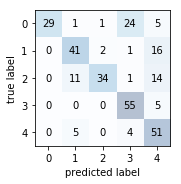

In [32]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)

In [1]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)

NameError: name 'conf_mat' is not defined

### Baseline

In [ ]:

pcanet = PCANet(
        image_shape= (256),
        filter_shape_l1=2, step_shape_l1=1, n_l1_output=4,
        filter_shape_l2=2, step_shape_l2=1, n_l2_output=4,
        block_shape=2
    )
pcanet.validate_structure()

pcanet.fit(x_train)
X_train = pcanet.transform(x_train)
X_test = pcanet.transform(x_test)

model = RandomForestClassifier(n_estimators=100, random_state=1234, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: " + str(accuracy))
